# Twitter Sentiment Analysis

### Importing
- Import all libraries
- Import training set and test set

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.probability import FreqDist
import re
import requests
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
%matplotlib inline

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")

In [3]:
train.head(n = 10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
train.tail(n = 10)

,id,label,tweet
31952,31953,0,@user you went too far with @user
31953,31954,0,good morning #instagram #shower #water #berlin...
31954,31955,0,#holiday bull up: you will dominate your bul...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [5]:
test = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv")

In [6]:
test.head(n = 10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [7]:
test.tail(n = 10)

,id,tweet
17187,49150,loving lifeðºð¸âï¸ð #createyourfutu...
17188,49151,"black professor demonizes, proposes nazi style..."
17189,49152,learn how to think positive. #positive #ins...
17190,49153,"we love the pretty, happy and fresh you! #teen..."
17191,49154,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [96]:
display(test)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


### Preprocessing
- Combine the test and train
- Remove Twitter Handles
- Remove the punctuations
- Remove small words
- Tokenize and Stem all the words : Remove the tenses and create nouns

In [8]:
combine = train.append(test,ignore_index=True,sort=True)

In [9]:
combine.head(n = 10)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...


In [10]:
combine.tail(n = 10)

,id,label,tweet
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...
49150,49151,NaN,"black professor demonizes, proposes nazi style..."
49151,49152,NaN,learn how to think positive. #positive #ins...
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen..."
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [11]:
def remove_handles(tweet_text,pattern):
    handles = re.findall(pattern,tweet_text)
    
    for x in handles:
        tweet_text = re.sub(x,"",tweet_text)
    
    
    return tweet_text

vectorfun = np.vectorize(remove_handles)
combine['Tidy Tweets'] = vectorfun(combine['tweet'],"@[\w]*")

In [12]:
combine.head(n = 10)

,id,label,tweet,Tidy Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [13]:
combine['Tidy Tweets'] = combine['Tidy Tweets'].str.replace("[^a-zA-Z#]"," ")

In [14]:
combine.head(n = 10)

,id,label,tweet,Tidy Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [15]:
combine["Tidy Tweets"] = combine["Tidy Tweets"].apply(lambda x: str(" ").join([word for word in x.split() if len(word) > 3 ]))

In [16]:
combine.head(n = 10)

,id,label,tweet,Tidy Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [17]:
tokens = combine["Tidy Tweets"].apply(lambda x: x.split())

In [18]:
tokens.head(n = 10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: Tidy Tweets, dtype: object

In [19]:
ps = nltk.stem.PorterStemmer()

In [20]:
tokens = tokens.apply(lambda x : [ps.stem(word) for word in x])

In [21]:
tokens.head(n = 10)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
5    [huge, fare, talk, befor, they, leav, chao, di...
6                              [camp, tomorrow, danni]
7    [next, school, year, year, exam, think, about,...
8    [love, land, #allin, #cav, #champion, #clevela...
9                                       [welcom, here]
Name: Tidy Tweets, dtype: object

In [22]:
combine["Tidy Tweets"] = tokens.apply(lambda x: str(" ").join(x))

In [23]:
combine.head(n = 10)

,id,label,tweet,Tidy Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talk befor they leav chao disput whe...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð...,next school year year exam think about that #s...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcom here


In [24]:
combine.tail(n = 10)

,id,label,tweet,Tidy Tweets
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...,love life #createyourfutur #lifestyl #holiday ...
49150,49151,NaN,"black professor demonizes, proposes nazi style...",black professor demon propos nazi style confis...
49151,49152,NaN,learn how to think positive. #positive #ins...,learn think posit #posit #instagram #instagood
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen...",love pretti happi fresh #teenilici #fixdermate...
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,damn tuff ruff muff techno citi ukhx #web hard...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factori left right polaris #trump #use...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feel like mermaid #hairflip #neverreadi #forma...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillari #campaign today #ohio use word like a...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happi work confer right mindset lead cultur de...
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...",song glad free download #shoegaz #newmus #newsong


### Data Visualization
 - Wordcloud Generation
 - Barplot Generation

In [25]:
Mask = np.array(Image.open("twitter.png"))

In [26]:
image_color = ImageColorGenerator(Mask)

In [27]:
positive_words = str(" ").join((combine["Tidy Tweets"][combine["label"]== 0]))

In [28]:
#positive_words = set()

In [29]:
#for index, row in positive_list.iteritems():
#    positive_words.update(row)

In [30]:
wc = WordCloud(width=4000,height=1500,mask=Mask,background_color="black").generate(positive_words)

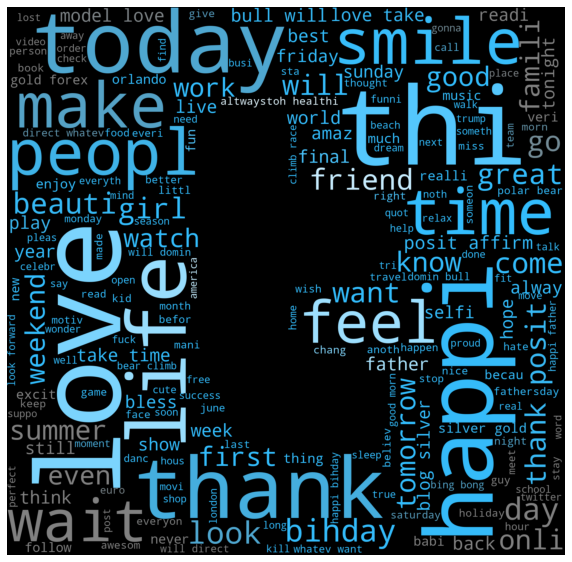

In [31]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_color),interpolation="hamming")
plt.axis("off")
plt.show()

In [32]:
negative_words = str(" ").join(combine["Tidy Tweets"][combine["label"]==1])

In [33]:
Maskneg = np.array(Image.open(requests.get("http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png",stream=True).raw))

In [34]:
image_color_neg = ImageColorGenerator(Maskneg)

In [35]:
wcneg = WordCloud(width=4000,height=1500,mask=Maskneg,background_color="black").generate(negative_words)

(-0.5, 1138.5, 925.5, -0.5)

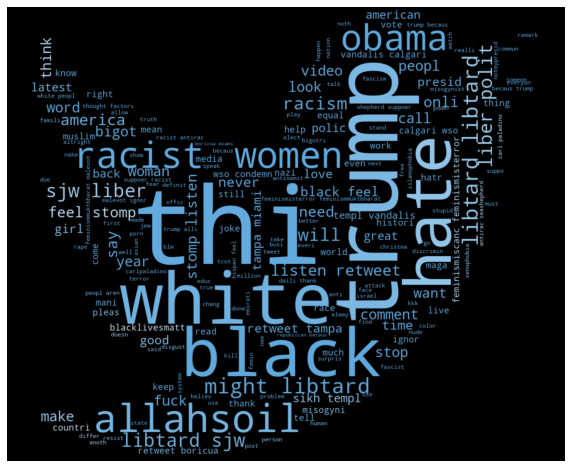

In [36]:
plt.figure(figsize=(10,20))
plt.imshow(wcneg.recolor(color_func=image_color_neg),interpolation="hamming")
plt.axis("off")

In [37]:
poslist = [x.split() for x in combine["Tidy Tweets"][combine["label"]==0]]

In [38]:
flatlist = [item for sublist in poslist for item in sublist if re.fullmatch(r'#(\w+)',item)]

In [39]:
print(flatlist)

['#run', '#lyft', '#disapoint', '#getthank', '#model', '#motiv', '#allshowandnogo', '#school', '#exam', '#hate', '#imagin', '#actorslif', '#revolutionschool', '#girl', '#allin', '#cav', '#champion', '#cleveland', '#clevelandcavali', '#ireland', '#blog', '#silver', '#gold', '#forex', '#orlando', '#standwithorlando', '#pulseshoot', '#orlandoshoot', '#biggerproblem', '#selfish', '#heabreak', '#valu', '#love', '#gettingf', '#got', '#junior', '#yugyoem', '#omg', '#thank', '#posit', '#friday', '#cooki', '#euro', '#badday', '#coneofsham', '#cat', '#piss', '#funni', '#laugh', '#wine', '#weekend', '#tgif', '#gamedev', '#indiedev', '#indiegamedev', '#squad', '#upsideofflorida', '#shopalyssa', '#love', '#smile', '#media', '#pressconfer', '#antalya', '#turkey', '#throwback', '#ica', '#alohafriday', '#time', '#not', '#exist', '#positivevib', '#hawaiian', '#goodnight', '#badmonday', '#taylorswift', '#travelingram', '#dalat', '#ripinkylif', '#photoshop', '#enoughisenough', '#dontphotoshopeveryth', '#

In [40]:
hashcounts = pd.Series(flatlist).value_counts()

In [41]:
hashcount_df = pd.DataFrame({"Hash":hashcounts.index,"Counts":hashcounts.values})

In [42]:
hashcount_df.head(n = 10)

,Hash,Counts
0,#love,1606
1,#posit,915
2,#smile,658
3,#healthi,572
4,#thank,532
5,#fun,444
6,#affirm,422
7,#life,417
8,#summer,378
9,#model,371


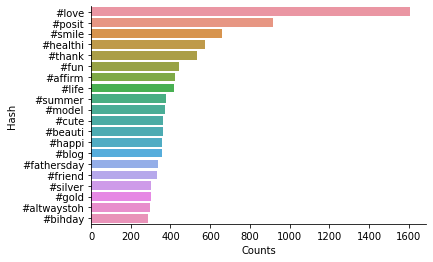

In [43]:
sns.barplot(data=hashcount_df.nlargest(n = 20,columns=["Counts"]),x = "Counts",y="Hash")
sns.despine()

In [44]:
negative_words = [x.split() for x in combine["Tidy Tweets"][combine["label"]==1]]
negative_words

[['#cnn',
  'call',
  '#michigan',
  'middl',
  'school',
  'build',
  'wall',
  'chant',
  '#tcot'],
 ['comment',
  '#australia',
  '#opkillingbay',
  '#seashepherd',
  '#helpcovedolphin',
  '#thecov',
  '#helpcovedolphin'],
 ['retweet', 'agre'],
 ['lumpi', 'say', 'prove', 'lumpi'],
 ['unbeliev',
  'that',
  'centuri',
  'need',
  'someth',
  'like',
  'thi',
  'again',
  '#neverump',
  '#xenophobia'],
 ['let', 'fight', 'against', '#love', '#peac'],
 ['white',
  'establish',
  'have',
  'folx',
  'run',
  'around',
  'love',
  'themselv',
  'promot',
  'great'],
 ['white', 'peopl', 'call', 'peopl', 'white', '#race', '#ident', '#med'],
 ['#altright', 'use', 'insecur', 'lure', 'into', '#whitesupremaci'],
 ['interest',
  '#linguist',
  'that',
  'doesn',
  'address',
  '#race',
  'racism',
  'about',
  '#power',
  '#raciolinguist',
  'bring'],
 ['mock', 'obama', 'be', 'black', '#brexit'],
 ['#peopl',
  'aren',
  'protest',
  '#trump',
  'becaus',
  '#republican',
  'they',
  'becaus',
  

In [45]:
negative_hashes = [x for sublist in negative_words for x in sublist if re.fullmatch(r'#(\w+)',x)]
negative_hashes

['#cnn',
 '#michigan',
 '#tcot',
 '#australia',
 '#opkillingbay',
 '#seashepherd',
 '#helpcovedolphin',
 '#thecov',
 '#helpcovedolphin',
 '#neverump',
 '#xenophobia',
 '#love',
 '#peac',
 '#race',
 '#ident',
 '#med',
 '#altright',
 '#whitesupremaci',
 '#linguist',
 '#race',
 '#power',
 '#raciolinguist',
 '#brexit',
 '#peopl',
 '#trump',
 '#republican',
 '#michelleobama',
 '#knick',
 '#golf',
 '#jewishsupremacist',
 '#libtard',
 '#sjw',
 '#liber',
 '#polit',
 '#trash',
 '#hate',
 '#stereotyp',
 '#prejudic',
 '#hope',
 '#hate',
 '#conflict',
 '#bluelivesmatt',
 '#draintheswamp',
 '#ferguson',
 '#antisemit',
 '#hocoschool',
 '#columbiamd',
 '#hocomd',
 '#nazi',
 '#hatr',
 '#bigotri',
 '#libtard',
 '#sjw',
 '#liber',
 '#polit',
 '#fyi',
 '#tcot',
 '#topoli',
 '#blacklivesmatt',
 '#ushistori',
 '#eugen',
 '#biher',
 '#bigotri',
 '#altright',
 '#potu',
 '#theresist',
 '#crime',
 '#offic',
 '#black',
 '#retweet',
 '#tampa',
 '#miami',
 '#allahsoil',
 '#prais',
 '#cleveland',
 '#rnc',
 '#white

In [46]:
negative_counts = pd.Series(negative_hashes).value_counts()
negative_counts

#trump                     136
#polit                      95
#allahsoil                  92
#liber                      81
#libtard                    77
                          ... 
#cwt                         1
#linguist                    1
#spreadlovethischristma      1
#airlin                      1
#zeroattack                  1
Length: 1712, dtype: int64

In [47]:
negative_df = pd.DataFrame({"Hash":negative_counts.index,"Counts":negative_counts.values})

In [48]:
negative_df.head(n = 10)

,Hash,Counts
0,#trump,136
1,#polit,95
2,#allahsoil,92
3,#liber,81
4,#libtard,77
5,#sjw,75
6,#retweet,63
7,#miami,46
8,#black,46
9,#hate,37


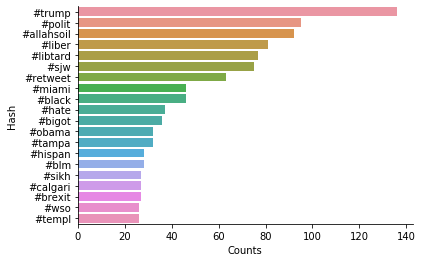

In [49]:
sns.barplot(data=negative_df.nlargest(n=20,columns=["Counts"]),x="Counts",y="Hash")
sns.despine()

In [50]:
neg_counts = FreqDist(negative_hashes)
neg_counts

FreqDist({'#trump': 136, '#polit': 95, '#allahsoil': 92, '#liber': 81, '#libtard': 77, '#sjw': 75, '#retweet': 63, '#black': 46, '#miami': 46, '#hate': 37, ...})

### Feature Extraction
- Bag Of Words Approach
- Term Frequency - Inverse Document Frequency
- Split the data into train and test

In [51]:
cv = CountVectorizer(max_df=0.90,min_df=2,stop_words='english',max_features=1000)
bow_matrix = cv.fit_transform(combine["Tidy Tweets"])
print(type(bow_matrix))

<class 'scipy.sparse.csr.csr_matrix'>


In [52]:
bow = pd.DataFrame(bow_matrix.todense())
display(bow)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
tfvec = TfidfVectorizer(max_df=0.90,min_df=2,stop_words='english',max_features=1000)
tfidf_matrix = tfvec.fit_transform(combine["Tidy Tweets"])

In [54]:
tfidf = pd.DataFrame(tfidf_matrix.todense())
display(tfidf)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
bow_train = bow[:31962]
display(bow_train)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
bow_test = bow[31962:]
display(bow_test)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
31962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
tfidf_train = tfidf[:31962]
display(tfidf_train)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
tfidf_test = tfidf[31962:]
display(tfidf_test)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
31962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
X_train_bow, X_validate_bow,y_train_bow,y_validate_bow = train_test_split(bow_train,combine[:31962]['label'],train_size=0.80,random_state=2)

In [60]:
X_train_tfidf,X_validate_tfidf,y_train_tfidf,y_validate_tfidf = train_test_split(tfidf_train,combine[:31962]['label'],train_size=0.80,random_state=2)

### Applying machine learning models
- Logistic Regression
- XGB Classifier
- Decision Tree Classifier

In [61]:
lr_bow = LogisticRegression(solver='lbfgs')
lr_bow.fit(X_train_bow,y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
lr_bow_proba = lr_bow.predict_proba(X_validate_bow)
display(lr_bow_proba)

array([[9.89112373e-01, 1.08876267e-02],
       [9.99765198e-01, 2.34801611e-04],
       [9.10996567e-01, 8.90034326e-02],
       ...,
       [9.91126456e-01, 8.87354441e-03],
       [9.80995240e-01, 1.90047599e-02],
       [9.95703900e-01, 4.29609979e-03]])

In [63]:
lr_bow_ar = lr_bow_proba[:,1] >= 0.3
type(lr_bow_ar)

numpy.ndarray

In [64]:
lr_bow_lb = lr_bow_ar.astype(int)

In [65]:
lr_bow_f1 = f1_score(y_validate_bow,lr_bow_lb)
display(lr_bow_f1)

0.5865384615384615

In [66]:
lr_tfidf = LogisticRegression(solver='lbfgs')
lr_tfidf.fit(X_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
lr_tfidf_pr = lr_tfidf.predict_proba(X_validate_tfidf)
display(lr_tfidf_pr)

array([[0.97782994, 0.02217006],
       [0.99617218, 0.00382782],
       [0.93040553, 0.06959447],
       ...,
       [0.98594088, 0.01405912],
       [0.9816949 , 0.0183051 ],
       [0.97295041, 0.02704959]])

In [68]:
lr_tfidf_lb = (lr_tfidf_pr[:,1] >=0.3).astype(int)
display(lr_tfidf_lb)

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
lr_tfidf_f1 = f1_score(y_validate_tfidf,lr_tfidf_lb)
display(lr_tfidf_f1)

0.5842696629213483

In [70]:
xgb_bow = XGBClassifier()
xgb_bow.fit(X_train_bow,y_train_bow)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [71]:
xgb_bow_pr = xgb_bow.predict_proba(X_validate_bow)

In [72]:
xgb_bow_lb = (xgb_bow_pr[:,1] >= 0.3).astype(int)
xgb_bow_f1 = f1_score(y_validate_bow,xgb_bow_lb)
display(xgb_bow_f1)

0.5590851334180432

In [73]:
xgb_tfidf = XGBClassifier()
xgb_tfidf.fit(X_train_tfidf,y_train_tfidf)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [74]:
xgb_tfidf_pr = xgb_tfidf.predict_proba(X_validate_tfidf)
xgb_tfidf_lb = (xgb_tfidf_pr[:,1] >= 0.3).astype(int)
xgb_tfidf_f1 = f1_score(y_validate_tfidf,xgb_tfidf_lb)
display(xgb_tfidf_f1)

0.5710594315245477

In [75]:
dt_bow = DecisionTreeClassifier()
dt_bow.fit(X_train_bow,y_train_bow)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
dt_bow_pr = dt_bow.predict_proba(X_validate_bow)

In [77]:
dt_bow_lb = (dt_bow_pr[:,1] >= 0.3).astype(int)
dt_bow_f1 = f1_score(y_validate_bow,dt_bow_lb)
display(dt_bow_f1)

0.4956672443674177

In [78]:
dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(X_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
dt_tfidf_pr = dt_tfidf.predict_proba(X_validate_tfidf)

In [80]:
dt_tfidf_lb = (dt_tfidf_pr[:,1] >= 0.3).astype(int)
dt_tfidf_f1 = f1_score(y_validate_tfidf,dt_tfidf_lb)
display(dt_tfidf_f1)

0.5593419506462984

### Model Comparision
- Create pointplots
- Select the best model
- Use it for labeling the test data

In [81]:
model_names = ["Logistic Regression","XGBClassifier","DecisionTreeClassifier"]
f1_bow_scores = np.array([lr_bow_f1,xgb_bow_f1,dt_bow_f1])
f1_bow_df = pd.DataFrame(data={"Model":model_names,"F1 Score":f1_bow_scores},index=[i for i in range(1,4)])
f1_bow_df.T

,1,2,3
Model,Logistic Regression,XGBClassifier,DecisionTreeClassifier
F1 Score,0.586538,0.559085,0.495667


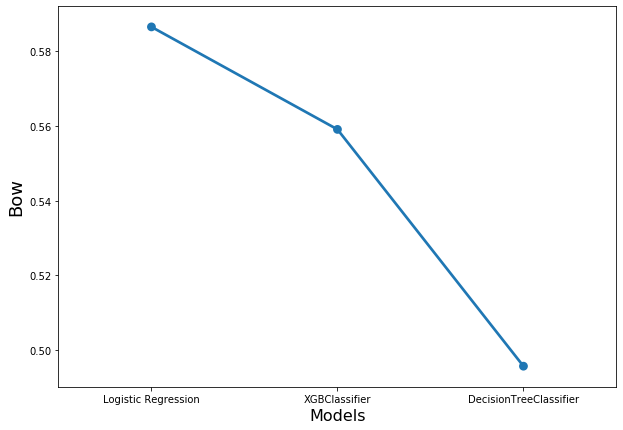

In [91]:
plt.figure(figsize=(10,7))
sns.pointplot(data=f1_bow_df,x="Model",y="F1 Score")
plt.xlabel("Models",fontsize=16)
plt.ylabel("Bow",fontsize=18)
plt.show()

In [86]:
f1_tfidf_scores =  np.array([lr_tfidf_f1,xgb_tfidf_f1,dt_tfidf_f1])
f1_tfidf_df = pd.DataFrame(data={"Models":model_names,"F1 Scores":f1_tfidf_scores},index=[i for i in range(1,4)])
f1_tfidf_df.T

,1,2,3
Models,Logistic Regression,XGBClassifier,DecisionTreeClassifier
F1 Scores,0.58427,0.571059,0.559342


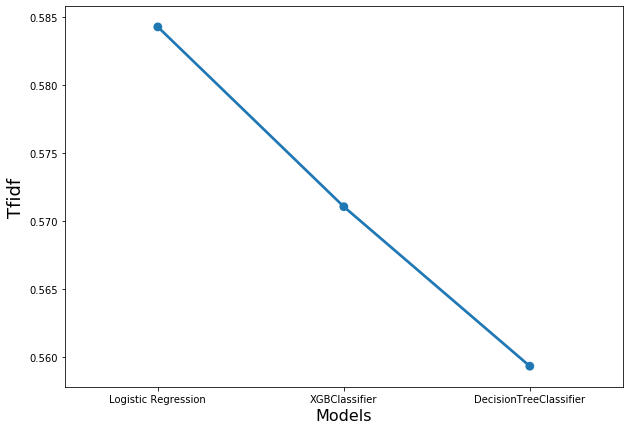

In [92]:
plt.figure(figsize=(10,7))
sns.pointplot(data=f1_tfidf_df,x="Models",y="F1 Scores")
plt.xlabel("Models",fontsize=16)
plt.ylabel("Tfidf",fontsize=18)
plt.show()

In [90]:
features= ["Bow Logistic Regression","Tfidf Logistic Regression"]
lr_f1scores = np.array([lr_bow_f1,lr_tfidf_f1])
lr_f1_df = pd.DataFrame(data={"Models":features,"F1 Scores":lr_f1scores},index=[i for i in range(1,3)])
lr_f1_df.T

,1,2
Models,Bow Logistic Regression,Tfidf Logistic Regression
F1 Scores,0.586538,0.58427


Text(0, 0.5, 'F1 Scores')

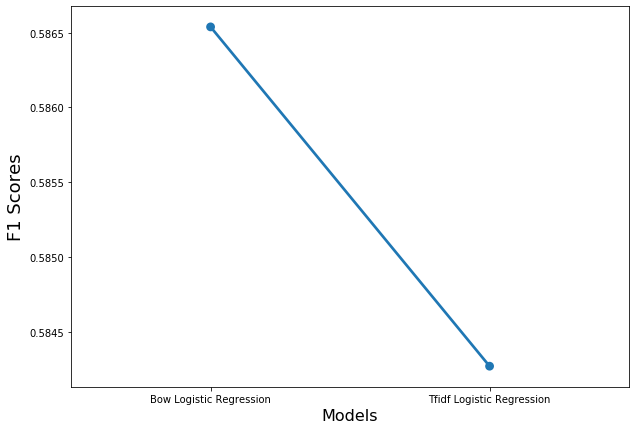

In [93]:
plt.figure(figsize=(10,7))
sns.pointplot(data=lr_f1_df,x="Models",y="F1 Scores")
plt.xlabel("Models",fontsize=16)
plt.ylabel("F1 Scores",fontsize=18)

In [94]:
test_pr = lr_bow.predict_proba(bow_test)
display(test_pr)

array([[9.12640009e-01, 8.73599906e-02],
       [7.55779516e-01, 2.44220484e-01],
       [9.82982509e-01, 1.70174912e-02],
       ...,
       [9.36354746e-01, 6.36452543e-02],
       [9.99021629e-01, 9.78370601e-04],
       [9.81720796e-01, 1.82792036e-02]])

In [102]:
test_lb = (test_pr[:,1] >= 0.3).astype(int)
#display(test_lb.shape)

test['label'] = test_lb
test.to_csv("test_prediction.csv",index=False)
display(test)

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,1
17193,49156,feeling like a mermaid ð #hairflip #neverre...,0
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,0
17195,49158,"happy, at work conference: right mindset leads...",0


In [103]:
display(test.head(n = 20))

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
5,31968,choose to be :) #momtips,0
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,0
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,0
8,31971,@user @user @user i will never understand why...,0
9,31972,#delicious #food #lovelife #capetown mannaep...,0
